# Chapter 5: Numerical Differentiation


**Goal**: Given the function f(x), compute $\frac{d^nf}{dx^n}$ at a given $x$.

## Introduction

f is given as:
* A program, or:
* A finite number of (x,y) data pairs.

Methods to compute f' rely on:
* The Taylor expansion of f, or
* Interpolation of f

Note: numerical differentiation is not an accurate process, it is prone to roundoff errors caused by limited machine precision.

## Finite Difference Approximations

### [Taylor](https://en.wikipedia.org/wiki/Brook_Taylor) expansion

The forward and backward Taylor expansion of f(x) at $h$ is:

$$
f(x+h) = f(x) + hf'(x) + \frac{h^2}{2!}f''(x) + \frac{h^3}{3!}f'''(x) + \frac{h^4}{4!}f^{(4)}(x) + \ldots \quad \mathrm{(a)}\\
f(x-h) = f(x) - hf'(x) + \frac{h^2}{2!}f''(x) - \frac{h^3}{3!}f'''(x) + \frac{h^4}{4!}f^{(4)}(x) + \ldots \quad \mathrm{(b)}
$$


### Central Difference Approximations in $\mathcal{o}\left(h^2\right)$


#### Expressions of f' and f''

Neglecting the terms in $h^3$, $h^4$ and higher powers of $h$ ($h$ should be small), Equations (a) and (b) can be seen as a system of linear equations in $f'$ and $f''$:



(a) + (b) gives:
$$
f(x+h) + f(x-h) = 2f(x) +h^2f''(x)
$$
That is:
$$
f''(x) = \frac{f(x+h)+f(x-h)-2f(x)}{h^2}
$$

Likewise, (a) - (b) gives:
$$
f(x+h) - f(x-h) = 2hf'(x)
$$
That is:
$$
f'(x) = \frac{f(x+h)-f(x-h)}{2h}
$$

#### $\mathcal{o}$ notation ('little-o')

In the previous Equations, we neglected the terms in $h^3$, $h^4$, etc.

To remember that all the powers of h larger than 2 were neglected, we add  $\mathcal{o}(h^2)$ to the equations:

$$
f'(x) = \frac{f(x+h)-f(x-h)}{2h} + \mathcal{o}\left(h^2\right) \quad \textbf{(1)} 
$$

$$
f''(x) = \frac{f(x+h)+f(x-h)-2f(x)}{h^2} + \mathcal{o}\left(h^2\right) \quad \textbf{(2)} 
$$

Equations $\textbf{(1)}$ and $\textbf{(2)}$ are called *first central difference approximation for f' and f''*.

#### Expression of f''' and $f^{(4)}$

We need two more equations to compute f''' and $f^{(4)}$. These are provided by the forward and backward Taylor expansion of $f$ at $2h$:

$$
f(x+2h) = f(x) + 2hf'(x) + \frac{4h^2}{2!}f''(x) + \frac{8h^3}{3!}f'''(x) + \frac{16h^4}{4!}f^{(4)}(x) + o\left(h^4\right)
$$
$$
f(x-2h) = f(x) - 2hf'(x) + \frac{4h^2}{2!}f''(x) - \frac{8h^3}{3!}f'''(x) + \frac{16h^4}{4!}f^{(4)}(x) + o\left(h^4\right)
$$
And Equations $\textbf{(a)}$ and $\textbf{(b)}$ need to be written up to the $h^4$ term:
$$
f(x+h) = f(x) + hf'(x) + \frac{h^2}{2!}f''(x) + \frac{h^3}{3!}f'''(x) + \frac{h^4}{4!}f^{(4)}(x) + o\left(h^4\right)\\
f(x-h) = f(x) - hf'(x) + \frac{h^2}{2!}f''(x) - \frac{h^3}{3!}f'''(x) + \frac{h^4}{4!}f^{(4)}(x) + o\left(h^4\right)
$$


By solving this system in $f'(x)$, $f''(x)$, $f'''(x)$ and $f^{(4)}(x)$, we obtain the first central difference approximations for f''' and $f^{(4)}$:
$$
f'''(x) = \frac{2f(x-h)+f(x+2h)-2f(x+h)-f(x-2h)}{2h^3} + \mathcal{o}\left( h^4 \right) \quad \textbf{(3)}
$$
$$
f^{(4)}(x) = \frac{f(x+2h)+f(x-2h)+6f(x)-4f(x-h)-4f(x+h)}{h^4} + \mathcal{o}\left( h^4 \right) \quad \textbf{(4)}
$$

#### Error analysis

Equations $\textbf{(1)}$ to $\textbf{(4)}$ are hampered by the following trade-off:
1. When $h$ is large, $\mathcal{o}\left( h^2 \right)$ is also large $\rightarrow$ the *truncation* error is large.
2. When $h$ is small:
   * $f(x) \approx f(x+h) \approx f(x-h) \approx f(x+2h) \approx f(x-2h)$.
   * The nominator and denominator in Equations $\textbf{(1)}$ to $\textbf{(4)}$ are close to zero.
   * $\rightarrow$ the *roundoff* error is large.
   
Numerical derivation is not an accurate process!

#### Implementation and illustration

The implementation of equations Equations $\textbf{(1)}$ to $\textbf{(4)}$ is straightforward:

In [1]:
def f_1(f, x, h=10E-2):
    return (f(x+h)-f(x-h))/(2*h)

def f_2(f, x, h=10E-2):
    return (f(x+h)-2*f(x)+f(x-h))/h**2

def f_3(f, x, h=10E-2):
    return (f(x+2*h)-2*f(x+h)+2*f(x-h)-f(x-2*h))/(2*h**3)

def f_4(f, x, h=10E-2):
    return (f(x+2*h)-4*f(x+h)+6*f(x)-4*f(x-h)+f(x-2*h))/h**4

In [2]:
from math import exp
from numpy import zeros
from numpy import zeros, ones, arange
from math import exp
n = 200
x = 1
incr_h = 10E-9
h = incr_h+incr_h*arange(n)
f = ones(n)*exp(x)
df = zeros(n)
ddddf = zeros(n)
for i in range(n):
    df[i] = f_1(exp, x, h[i])
    ddddf[i] = f_4(exp, x, h[i])
    
from matplotlib import pyplot as plt
plt.plot(h, f, h, df)
plt.legend(("reference", "f'"))
plt.show()
plt.plot(h, f, h, ddddf)
plt.legend(("reference", "$f^{(4)}$"))
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

### Non-central approximations

Central approximations are not always usable. For instance, if the function is given at $x_0$, ..., $x_n$, they cannot be used
to compute the derivatives at $x_0$ and $x_n$.

#### Approximation in $\mathcal{o}\left(h\right)$

The first *forward* approximation of f' is obtained from Equation $\textbf{(a)}$:

$$
f(x+h) = f(x) + hf'(x) + \mathcal{o}\left( h \right)
$$

which gives:

$$
f'(x) = \frac{f(x+h)-f(x)}{h} + \mathcal{o}\left( h \right) \quad \textbf{(5)}
$$

Likewise, the first *backward* approximation of f' is obtained from Equation $\textbf{(b)}$:

$$
f(x-h) = f(x) - hf'(x) + \mathcal{o}\left( h \right)
$$

which gives:

$$
f'(x) = \frac{f(x)-f(x-h)}{h} + \mathcal{o}\left( h \right)
$$

#### Error analysis

Approximations in $\mathcal{o}\left(h\right)$ are not accurate, as illustrated below.

In [3]:
def first_forward(f, x, h):
    return (f(x+h)-f(x))/h

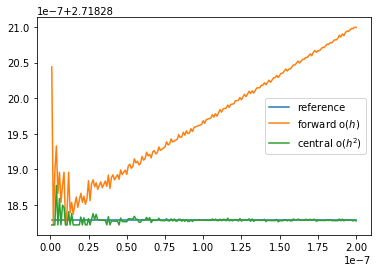

In [4]:
from numpy import zeros, ones, arange
from math import exp
n = 200
x = 1
incr_h = 10E-10
h = incr_h+incr_h*arange(n)
f = ones(n)*exp(x)
df = zeros(n)
df_cent = zeros(n)
for i in range(n):
    df[i] = first_forward(exp, x, h[i])
    df_cent[i] = f_1(exp, x, h[i]) # central approximation

    
from matplotlib import pyplot as plt
plt.plot(h, f, h, df, h, df_cent)
plt.legend(('reference', 'forward o($h$)', 'central o($h^2$)'))
plt.show()

#### Approximation in $\mathcal{o}\left(h^2\right)$

First-order approximations are not accurate. Instead, second-order *forward* approximations of $f'$ and $f''$ can be obtained from the following equations:

$$
f(x+h) = f(x) + hf'(x) + \frac{h^2}{2!}f''(x) + o\left(h^2\right)
$$

$$
f(x+2h) = f(x) + 2hf'(x) + \frac{4h^2}{2!}f''(x)+ o\left(h^2\right)
$$


Solving these equations in $f'(x)$ and $f''(x)$ gives:
$$
f'(x) = \frac{-f(x+2h)+4f(x+h)-3f(x)}{2h} +\mathcal{o}\left(h^2\right) \quad \textbf{(6)}
$$
$$
f''(x) = \frac{f(x+2h)-2f(x+h)+f(x)}{h}+\mathcal{o}\left(h^2\right)
$$

Forward approximations of $f'''(x)$ uses Taylor expansions of $f(x+3h)$, $f^{(4)}$ uses $f(x+4h)$, etc.

Equation $\textbf{(6)}$ is much more accurate than Equation $\textbf{(5)}$, as illustrated below:

In [5]:
def second_forward(f, x, h):
    return (-f(x+2*h)+4*f(x+h)-3*f(x))/(2*h)

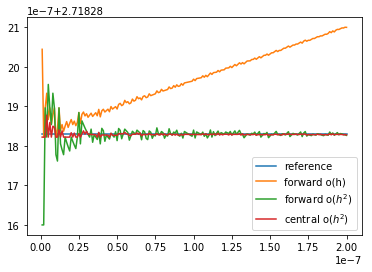

In [6]:
from numpy import zeros, ones, arange
from math import exp
n = 200
x = 1
incr_h = 10E-10
h = incr_h+incr_h*arange(n)
f = ones(n)*exp(x)
df = zeros(n)
df_cent = zeros(n)
df_second = zeros(n)
for i in range(n):
    df[i] = first_forward(exp, x, h[i]) # o(h) forward approximation
    df_second[i] = second_forward(exp, x, h[i]) # o(h**2) forward approximation
    df_cent[i] = f_1(exp, x, h[i]) # central approximation
    
from matplotlib import pyplot as plt
plt.plot(h, f, h, df, h, df_second, h, df_cent)
plt.legend(('reference', 'forward o(h)', 'forward o($h^2$)', 'central o($h^2$)'))
plt.show()

### Example (in class)

Example 5.1 in textbook.

## [Richardson](https://en.wikipedia.org/wiki/Lewis_Fry_Richardson) Extrapolation

Richardson extrapolation is a way to boost numerical accuracy.

Suppose that we have some quantity G that we can estimate using parameter $h$ with error $e$:
$$
G = g(h) + e(h)
$$
Richardson extrapolation assumes that the error is in the form $e(h)=ch^p$, with c and p constants.

We compute $G$ with two values of h, $h_1$ and $h_2$:

$$
G = g(h_1) + ch_1^p
$$
$$
G = g(h_2) + ch_2^p
$$


From the first equation, we get:
$$
c= \frac{G-g(h_1)}{h_1^p}
$$
which gives, in the second equation:
$$
G = \frac{h_1^pg(h_2)-h_2^2g(h_1)}{h_1^p-h_2^p}
$$

### Example (in class)

1. Richardson extrapolation for $\mathcal{o}(n)$ approximation of $f'(x)=e^x$ at x=1, with $h_1=0.1$ and $h_2=0.2$.

## Derivatives by interpolation